In [1]:
# Setup imports
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt

from engine.backtester import Backtester
from strategies.bollinger_bands import BollingerBandStrategy
from utils.metrics import CAGR, sharpe_ratio, max_drawdown, win_rate, profit_factor


In [2]:
# Load data
data_path = "../data/EURUSD.csv"
df = pd.read_csv(data_path)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = df['Date'].str.split(' ').str[0:2]
df['Date'] = df['Date'].str.join(' ')
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index, format = '%d.%m.%Y %H:%M:%S.%f')

In [3]:
# Add strategy signals
fast_window = 50
slow_window = 200
window = 20
std_multiplier = 2
atr_window = 20
atr_sl = 0.5

df = BollingerBandStrategy(df, fast_window, slow_window, atr_window, atr_sl, bollinger_window=window, std_multiplier=std_multiplier).generate_signals()

In [4]:
# Run backtest
account_size = 100000
backtester = Backtester(df, account_size=account_size)
backtester.run()
trade_log = backtester.get_trade_log()

In [5]:
# Performance summary and metrics
if not trade_log.empty:
    trade_log['cumulative_sum'] = trade_log['Net PnL'].cumsum() + account_size
    print(trade_log.head())

    print("\n===== Performance Metrics =====")
    print(f"CAGR (%): {CAGR(trade_log, account_size)}")
    print(f"Sharpe Ratio: {sharpe_ratio(trade_log)}")
    print(f"Max Drawdown (%): {max_drawdown(trade_log)}")
    print(f"Win Rate (%): {win_rate(trade_log)}")
    print(f"Profit Factor: {profit_factor(trade_log)}")
else:
    print("No trades were executed.")

          Entry Time   Entry Price           Exit Time   Exit Price   Size   \
0 2024-05-09 17:30:00       1.07595 2024-05-09 18:30:00      1.07638  10000   
1 2024-05-09 19:30:00       1.07759 2024-05-09 20:30:00      1.07705  10000   
2 2024-05-10 18:30:00       1.07877 2024-05-10 19:30:00      1.07641  10000   
3 2024-05-17 19:30:00       1.08766 2024-05-17 20:30:00      1.08687  10000   
4 2024-05-23 19:30:00       1.08246 2024-05-23 21:30:00      1.08184  10000   

   Spread  Direction   Take Profit   Stop Loss   Net PnL Exit Type   \
0    10000        Buy      1.076328    1.075572      2.3     Profit   
1    10000        Buy      1.078025    1.077155     -7.4       Loss   
2    10000        Buy      1.079103    1.078437    -25.6       Loss   
3    10000        Buy      1.088050    1.087270     -9.9       Loss   
4    10000       Sell      1.082000    1.082920      4.2     Profit   

   cumulative_sum  
0        100002.3  
1         99994.9  
2         99969.3  
3         99959.4 

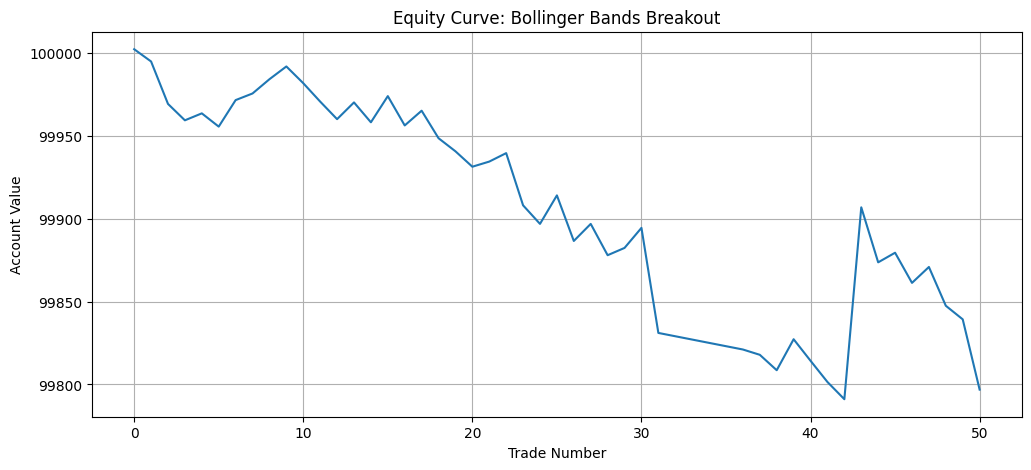

In [6]:
# Visualize results (Equity curve)
if not trade_log.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(trade_log['cumulative_sum'])
    plt.title("Equity Curve: Bollinger Bands Breakout")
    plt.xlabel("Trade Number")
    plt.ylabel("Account Value")
    plt.grid()
    plt.show()